# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
img_size=224  #227 for AlexNet, 224 for the rest
Batch_size=64

In [3]:
# import os
# import random
# import shutil


# # Set the number of images to extract from each class
# num_images = 400

# # Set the root directory of the dataset
# root_dir = '/content/drive/MyDrive/Datasets/White Background Cut'

# # Create a new directory to store the extracted images
# extracted_dir = '/content/drive/MyDrive/Datasets/White Background Cropped'
# if not os.path.exists(extracted_dir):
#     os.makedirs(extracted_dir)

# # Iterate over each class in the dataset
# for class_dir in os.listdir(root_dir):
#     # Create a new directory for the class in the extracted images directory
#     class_extracted_dir = os.path.join(extracted_dir, class_dir)
#     if not os.path.exists(class_extracted_dir):
#         os.makedirs(class_extracted_dir)
#     # List the files in the class's directory
#     class_files = os.listdir(os.path.join(root_dir, class_dir))
#     # Select a random subset of the files
#     selected_files = random.sample(class_files, num_images)
#     # Copy the selected files to the class's directory in the extracted images directory
#     for f in selected_files:
#         src = os.path.join(root_dir, class_dir, f)
#         dst = os.path.join(class_extracted_dir, f)
#         shutil.copy(src, dst)

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
# Define the transformations to apply to the images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Load the dataset and split it into training and test sets
data_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/White Background Cropped',
    target_size=(img_size, img_size),
    batch_size=Batch_size,
    class_mode='categorical'
)

# Initialize empty arrays to hold the images and labels
X = np.empty((0, img_size, img_size, 3))
y = np.empty((0, 6))

# Iterate over the entire dataset
for x, label in data_generator:
    # Concatenate the images and labels to the arrays
    X = np.concatenate((X, x))
    y = np.concatenate((y, label))
    # Break the loop when all images have been processed
    if len(X) == data_generator.n:
        break
        
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Found 2400 images belonging to 6 classes.


# LeNet

In [ ]:
# Define the LeNet model
model = keras.models.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=Batch_size, validation_data=(X_test, y_test))

Epoch 1/10
30/30 [==============================] - 4s 101ms/step - loss: 2.2275 - accuracy: 0.1854 - val_loss: 1.7455 - val_accuracy: 0.3229
Epoch 2/10
30/30 [==============================] - 2s 78ms/step - loss: 1.4949 - accuracy: 0.4156 - val_loss: 1.1381 - val_accuracy: 0.6062
Epoch 3/10
30/30 [==============================] - 2s 77ms/step - loss: 0.9521 - accuracy: 0.6354 - val_loss: 0.7735 - val_accuracy: 0.7000
Epoch 4/10
30/30 [==============================] - 2s 78ms/step - loss: 0.6007 - accuracy: 0.7859 - val_loss: 0.5293 - val_accuracy: 0.8271
Epoch 5/10
30/30 [==============================] - 2s 77ms/step - loss: 0.4407 - accuracy: 0.8479 - val_loss: 0.5588 - val_accuracy: 0.7750
Epoch 6/10
30/30 [==============================] - 2s 78ms/step - loss: 0.3276 - accuracy: 0.8865 - val_loss: 0.3484 - val_accuracy: 0.8771
Epoch 7/10
30/30 [==============================] - 2s 79ms/step - loss: 0.2819 - accuracy: 0.9026 - val_loss: 0.4242 - val_accuracy: 0.8438
Epoch 8/10
3

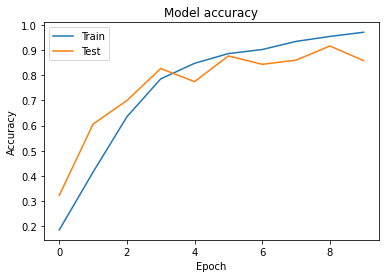

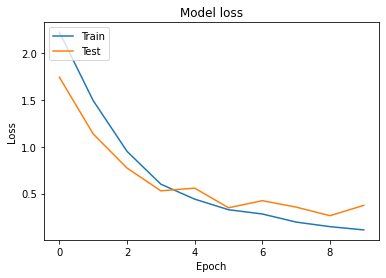

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/Models/LeNet_white_2400.h5') 

# AlexNet

In [ ]:
# Define the AlexNet model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(img_size,img_size,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(6, activation='softmax')
])

# Compile the model with the loss function and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=12, batch_size=Batch_size, validation_data=(X_test, y_test))


Epoch 1/12
30/30 [==============================] - 4s 112ms/step - loss: 11.8116 - accuracy: 0.5161 - val_loss: 662.0038 - val_accuracy: 0.1729
Epoch 2/12
30/30 [==============================] - 3s 95ms/step - loss: 1.3899 - accuracy: 0.6865 - val_loss: 193.4837 - val_accuracy: 0.1729
Epoch 3/12
30/30 [==============================] - 3s 95ms/step - loss: 0.8113 - accuracy: 0.7615 - val_loss: 57.0888 - val_accuracy: 0.1729
Epoch 4/12
30/30 [==============================] - 3s 95ms/step - loss: 0.5732 - accuracy: 0.7880 - val_loss: 32.0908 - val_accuracy: 0.1729
Epoch 5/12
30/30 [==============================] - 3s 95ms/step - loss: 0.5417 - accuracy: 0.8052 - val_loss: 10.3870 - val_accuracy: 0.2833
Epoch 6/12
30/30 [==============================] - 3s 94ms/step - loss: 0.4192 - accuracy: 0.8510 - val_loss: 8.2947 - val_accuracy: 0.2854
Epoch 7/12
30/30 [==============================] - 3s 96ms/step - loss: 0.4552 - accuracy: 0.8349 - val_loss: 4.1381 - val_accuracy: 0.4083
Epoc

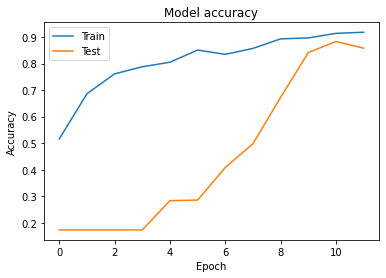

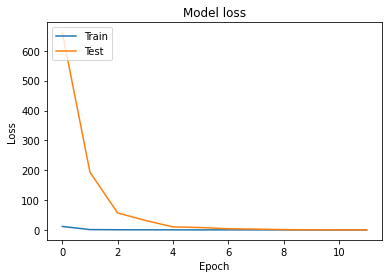

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/Models/alexNet_white_2400.h5') 

In [ ]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Models/alexNet_white_10_epoch.h5')

# VGG-16

In [19]:
# Define the VGG model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(input_shape=(img_size,img_size,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=4096, activation="relu"))
model.add(keras.layers.Dense(units=4096,activation="relu"))
model.add(keras.layers.Dense(units=6, activation="softmax"))
# Compile the model with the loss function and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_50 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [21]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=Batch_size, validation_data=(X_test, y_test))

Epoch 1/10
30/30 [==============================] - 28s 921ms/step - loss: 1.9176 - accuracy: 0.1516 - val_loss: 1.7930 - val_accuracy: 0.1604
Epoch 2/10
30/30 [==============================] - 29s 981ms/step - loss: 1.7928 - accuracy: 0.1589 - val_loss: 1.7925 - val_accuracy: 0.1604
Epoch 3/10
30/30 [==============================] - 29s 967ms/step - loss: 1.7920 - accuracy: 0.1589 - val_loss: 1.7927 - val_accuracy: 0.1542
Epoch 4/10
30/30 [==============================] - 29s 972ms/step - loss: 1.7919 - accuracy: 0.1698 - val_loss: 1.7926 - val_accuracy: 0.1542
Epoch 5/10
30/30 [==============================] - 29s 971ms/step - loss: 1.7922 - accuracy: 0.1698 - val_loss: 1.7928 - val_accuracy: 0.1542
Epoch 6/10
30/30 [==============================] - 29s 970ms/step - loss: 1.7920 - accuracy: 0.1698 - val_loss: 1.7927 - val_accuracy: 0.1542
Epoch 7/10
30/30 [==============================] - 29s 972ms/step - loss: 1.7919 - accuracy: 0.1536 - val_loss: 1.7925 - val_accuracy: 0.1542

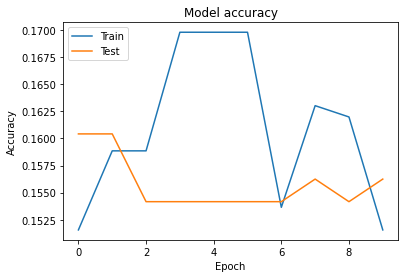

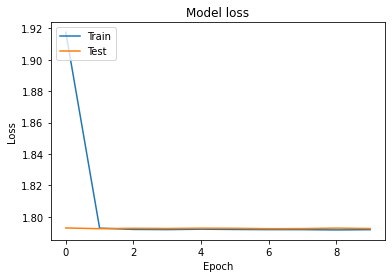

In [22]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.save('/content/drive/MyDrive/Models/vgg_white_2400.h5') 

In [24]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Models/vgg_white_10_epochs.h5')

# ResNet

In [12]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [13]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [14]:
def ResNet34(shape = (img_size, img_size, 3), classes = 6):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [15]:
#Sequential
model = ResNet34(shape = (img_size, img_size, 3), classes = 6)
# Compile the model with the loss function and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=Batch_size, validation_data=(X_test, y_test))

Epoch 1/10
30/30 [==============================] - 18s 433ms/step - loss: 7.5443 - accuracy: 0.2609 - val_loss: 2793917440.0000 - val_accuracy: 0.1813
Epoch 2/10
30/30 [==============================] - 12s 396ms/step - loss: 2.0317 - accuracy: 0.4370 - val_loss: 1386083.3750 - val_accuracy: 0.1688
Epoch 3/10
30/30 [==============================] - 12s 401ms/step - loss: 2.2173 - accuracy: 0.5052 - val_loss: 1544449.2500 - val_accuracy: 0.1792
Epoch 4/10
30/30 [==============================] - 12s 397ms/step - loss: 1.7642 - accuracy: 0.6458 - val_loss: 764882.7500 - val_accuracy: 0.1792
Epoch 5/10
30/30 [==============================] - 12s 392ms/step - loss: 0.7715 - accuracy: 0.7312 - val_loss: 15044.7920 - val_accuracy: 0.2042
Epoch 6/10
30/30 [==============================] - 12s 392ms/step - loss: 0.9715 - accuracy: 0.7250 - val_loss: 138.7801 - val_accuracy: 0.3229
Epoch 7/10
30/30 [==============================] - 12s 393ms/step - loss: 0.6842 - accuracy: 0.7401 - val_los

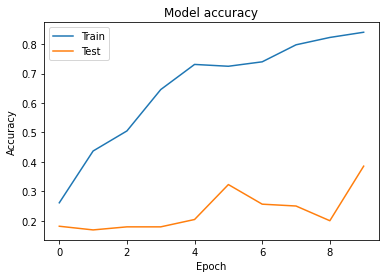

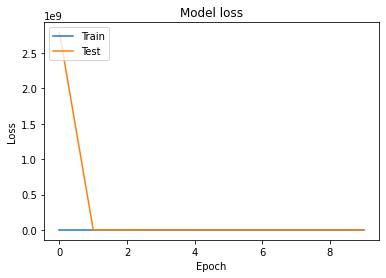

In [16]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
model.save('/content/drive/MyDrive/Models/resNet_white_2400.h5') 

In [18]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Models/resNet_white_10_epoch.h5')

# GoogleNet

In [33]:
import keras
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf
from keras.models import Model
from keras.layers import (Conv2D, MaxPool2D,  
Dropout, Dense, Input, concatenate,    
GlobalAveragePooling2D, AveragePooling2D,  
Flatten) 
import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [34]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [35]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [36]:
input_layer = Input(shape=(img_size, img_size, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(6, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(6, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(6, activation='softmax', name='output')(x)

In [37]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [38]:
epochs = 50
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

In [39]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=256, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
8/8 [==============================] - 27s 2s/step - loss: 3.1497 - output_loss: 1.9806 - auxilliary_output_1_loss: 1.9284 - auxilliary_output_2_loss: 1.9686 - output_accuracy: 0.1630 - auxilliary_output_1_accuracy: 0.1521 - auxilliary_output_2_accuracy: 0.1583 - val_loss: 2.9801 - val_output_loss: 1.9033 - val_auxilliary_output_1_loss: 1.7960 - val_auxilliary_output_2_loss: 1.7933 - val_output_accuracy: 0.1604 - val_auxilliary_output_1_accuracy: 0.1562 - val_auxilliary_output_2_accuracy: 0.1562 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/50
8/8 [==============================] - 7s 873ms/step - loss: 2.9626 - output_loss: 1.8798 - auxilliary_output_1_loss: 1.7974 - auxilliary_output_2_loss: 1.8119 - output_accuracy: 0.1573 - auxilliary_output_1_accuracy: 0.1698 - auxilliary_output_2_accuracy: 0.1667 - val_loss: 2.8871 - val_output_loss: 1.8116 - val_auxilliary_output_1_los

In [41]:
#model.save('/content/drive/MyDrive/Models/inception_white_2400.h5') 

# Model Testing

In [2]:
from keras.models import load_model
#model = load_model('/content/drive/MyDrive/Models/balanced models/LeNet_white_2400.h5')
#model = load_model('/content/drive/MyDrive/Models/balanced models/alexNet_white_2400.h5')
#model = load_model('/content/drive/MyDrive/Models/balanced models/vgg_white_2400.h5')
#model = load_model('/content/drive/MyDrive/Models/balanced models/inception_white_2400.h5')
#model = load_model('/content/drive/MyDrive/Models/balanced models/resNet_white_2400.h5')
#model = load_model('/content/drive/MyDrive/Models/alexNet_White_50_epoch.h5')

In [9]:
import pathlib
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def normalize_image(image):
  # Normalize the image between 0 and 1
  image = image.astype(float) / 255.0
  return image

@tf.function
def predict(model, img_tensor):
  # Make the prediction
  predictions = model(img_tensor)

  # Get the class with the highest score
  score_index = tf.argmax(predictions[0])
  score =  predictions[0, score_index]

  return score_index, score

class_names = {'Chipa': 0, 'Chipa guazú': 1, 'Mbeju': 2, 'Pajagua': 3, 'Pastel mandi_o': 4, 'Sopa': 5}
class_names = list((k) for k,v in class_names.items())
image_path = '/content/drive/MyDrive/Datasets/White Background Cropped/Pajagua/20220718004433826.jpg'

# Load the image and convert it to a NumPy array
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image)

# Resize the image
image = cv2.resize(image, (227, 227)) #For LeNet and AlexNet
#image = cv2.resize(image, (224, 224)) #For VGG-16, ResNet and GoogleNet

# Normalize the image
normalized_image = normalize_image(image)

# Convert the normalized image to a tensor
img_tensor = tf.convert_to_tensor(normalized_image)

# Add the batch dimension
img_tensor = tf.expand_dims(img_tensor, 0)

# Call the prediction function
score_index, score = predict(model, img_tensor)

# Show image
plt.imshow(normalized_image)

# Print the class and score
print('Class : ' , class_names[score_index], '- Confidence: ', str(score.numpy()))


error: ignored

In [78]:
import tkinter as tk

def show_popup():
  # Create the pop-up window
  window = tk.Tk()
  window.title("Pop-up Window")

  # Add a label to the window
  label = tk.Label(window, text="This is a pop-up window", font=("Arial", 16))
  label.pack()

  # Run the window loop
  window.mainloop()

# Call the show_popup function to display the pop-up window
show_popup()

TclError: ignored